# Digital Filters

## Activity

**Briefing time**: 30 mins  
**Activity time**: 120 mins  
**Recommended group size**: 2-3 students  
**Objectives**:
- To learn basics of signal processing using Python.
- To appreciate the power of filters for signal processing.

**Materials** (per group):
- Laptop computer with sound card.
- Jupyter notebook with Python installed on computer, and the following packages: `numpy`, `scipy`, `matplotlib`.
- Copy of this Jupyter notebook downloaded.
- The sound file (`secretmsg.wav`).

## Task

You work for a secret organization responsible for the safety of the world. You have been put in charge of decoding a secret message that has been intercepted. The message is in the form of a sound recording (`secretmsg.wav`), and it is believed that there is an important conversation in the recording. However, the recording is contaminated by loud jamming noises and hence the conversation is hard to decipher. Your task is to clean up the recording so that the conversation can be clearly heard.

## Workbook

In [1]:
import numpy as np
import scipy.io.wavfile as wavfile
import scipy.signal as sig
import matplotlib.pyplot as plt
from IPython.display import Audio
%matplotlib inline

### Load the recording

Load sound file into memory:  
(`fs` is the sampling rate, and `x` contains the sound signal as discrete samples of acoustic pressure measured at the sampling rate)

In [2]:
fs, x = wavfile.read('secretmsg.wav')

Play the sound:

In [3]:
Audio(x, rate=fs)

### Analyze the recording

Recall that a Fourier transform allows us to decompose a complicated signal into a sum of sine/cosine waves with different frequencies (and phase). This is a good tool to analyze the frequency content of a signal. By taking sections of the signal, applying a Fourier transform, ignoring the phase, and averaging across the sections, we get what is known as a _power spectral density_ (psd). The psd shows the energy in the signal as a function of frequency.

Check the frequency content in the file:

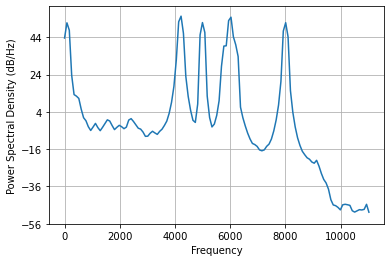

In [4]:
plt.psd(x, Fs=fs);

You see many strong jamming frequencies in the plot above. You need to get rid of them in order to decipher the conversation. How would you do this?

### Filter away the jamming frequencies

You have already learned about RC filter circuits. Similar filters can also be digitally synthesized and applied in a computer, without you having to build the circuit. In fact, digital filters can be very flexible, allowing you to design filters with much sharper response than typical RC filter circuits.

A digital low-pass filter is designed as follows:  
(example uses 8.5 kHz cutoff frequency)

In [5]:
filt_len = 255         # this controls how sharp the filter response is (larger => sharper)
cutoff_freq = 8500     # this is the cutoff frequency in Hz
filt1 = sig.firwin(filt_len, cutoff_freq, pass_zero=True, fs=fs)

You can visualize the frequency response of this filter:

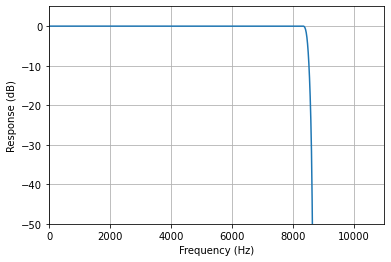

In [6]:
sig.freqz(filt1, plot=lambda w, h: plt.plot(fs*w/(2*np.pi), 20*np.log10(np.abs(h))));
plt.xlabel('Frequency (Hz)');
plt.ylabel('Response (dB)');
plt.xlim([0, 11000]);
plt.ylim([-50, 5]);
plt.grid(True);

A digital high-pass filter is designed similarly:  
(example uses 7.5 kHz cutoff frequency)

In [7]:
filt_len = 255         # this controls how sharp the filter response is (larger => sharper)
cutoff_freq = 7500     # this is the cutoff frequency in Hz
filt2 = sig.firwin(filt_len, cutoff_freq, pass_zero=False, fs=fs)

To apply a filter `filt2` to a signal `x`, you do:

In [8]:
y = sig.lfilter(filt2, 1, x)

You can check if the filtering has worked by looking at the frequency content of the filtered signal:

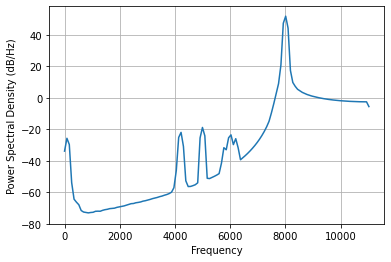

In [9]:
plt.psd(y, Fs=fs);

You can pass the output of one filter to another, to apply multiple filters, if desired.

Your task is to design appropiate filters using the methods shown above to remove jamming frequencies and clean up the recording and decipher the secret message.

**Hint**: Find out what frequencies typical human voice contain, and whether you can filter away the jamming frequencies without affecting voice much.

### Playback and save the cleaned up recording

Once you have the deciphered signal (say `y`), you can play it back:

In [10]:
Audio(y, rate=fs)

And you can save it into a wav file:

In [11]:
y1 = np.int16(y/np.max(np.abs(y))*32767)
wavfile.write('deciphered.wav', fs, y1)

When you have successfully deciphered the message, play it back for your Professor or GA.  
Good luck!